## Naive Bayes Classifier

### Index 
- [Equation and Method](#equation)
- [Pre processing](#preprocessing)
- [Building the model](#building)
- [Result](#result)

In [3]:
# importing some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


\<a id='equation'></a>
### Equation and Method

The basic idea of this method is to use Bayes theorem to calculate the posterior probability of classifying it into the categories.

##### Bayes Theorem

### $P(A|B) = \frac{P(B|A)*P(A)}{P(B)}$

Where,

- $P(A|B)$ is the posterior probability.
- $P(B|A)$ is the Marginal Likelihood.
- $P(A)$ is the prior probability.
- $P(B)$ is the Marginal probability.

##### Applying bayes theorem

The basic idea is to plot the distribution of data with the categories. And the data point to be classified is selected,

<img src="http://www.assignmentpoint.com/wp-content/uploads/2016/05/Naive-Bayes-Classifier.jpg" style="margin:0px;">

This data point is then enclosed in a margin of selected radius, and the point is classified according to the probabilities calculated from that as follows.

- The prior probability will be the general probability of the data point being in a particular category.
- The Marginal probability is the probability that a data point selected will lie inside our selected margin.
- The Marginal Likelyhood is the probability that, given a data point is of a particular category, that point is inside the margin.
- And finally we calculate the posterior probability, i.e the probability that our data point is in a particular category given that it lies in our margin.

The probabilities are compared and the data point is classified according to the highest probability of the classes.
While comparing, we can avoid the denominator as it is common and will be easier for computation as the comparision is only important and the values are not important.

<a id='preprocessing'></a>
### Pre processing

In [4]:
## importing the libraries for simple linear regression.
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
datset = pd.read_csv('Social_Network_Ads.csv')

In [6]:
x = datset.iloc[:, 2:4].values
y = datset.iloc[:, 4].values

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [8]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

/home/nevin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


<a id='building'></a>
### Building the model.
Training the model, We use [Gaussian Naive Bayes](https://en.wikipedia.org/wiki/Naive_Bayes_classifier#Gaussian_naive_Bayes)  model using the [GaussianNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) class.

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

In [16]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB(priors=None)

In [17]:
y_pred = classifier.predict(x_test)

In [18]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[65,  3],
       [ 7, 25]])

<a id='result'></a>
### Result

In [19]:
def plot_regions(x, y, title):
    X_set, y_set = x, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

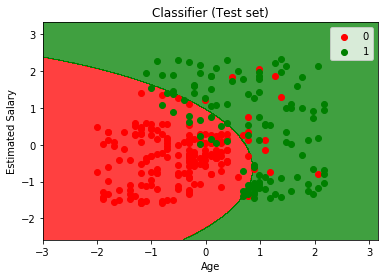

In [20]:
plot_regions(x_train, y_train, 'Classifier (Training set)')

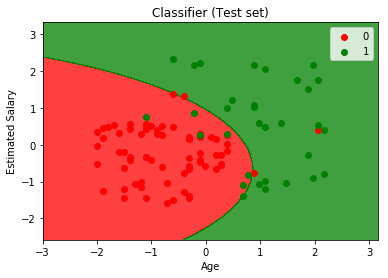

In [21]:
plot_regions(x_test, y_test, 'Classifier (Test set)')

##### Conclusion

We can see that the Naive Bayes model does not perform as well as the K-NN model, However this techique is very useful for classification.